## K-nearest neighbors

In [2]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#cross validation 
from sklearn.model_selection import cross_val_score, GridSearchCV
# import custom functions
from custom_functions import our_metrics
%config Completer.use_jedi = False
pd.set_option('display.max_rows', None)

In [3]:
# reading all the csv files 
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv')
X_test = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_dropped_first.csv')
X_train = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_dropped_first.csv')

In [4]:
# Train model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3294
_____________________
Weighted Quadratic Kappa: 0.1951


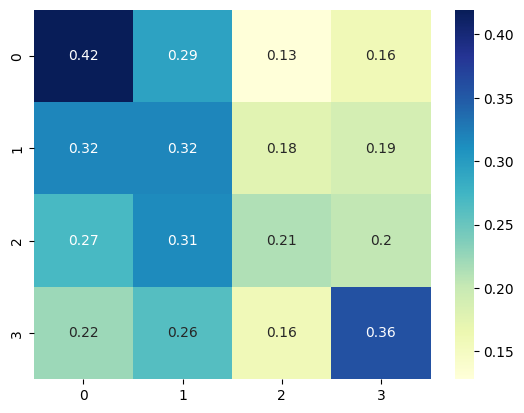

In [5]:
# Predict on test set
y_pred = knn.predict(X_test)

# Print accuracy score  and weighted Kappa
our_metrics(y_test, y_pred, normalize=True)

# Print confusion matrix
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn', fmt='g');

### Evaluate the KNN 

In [6]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, np.ravel(y_train))
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(3749, 1)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

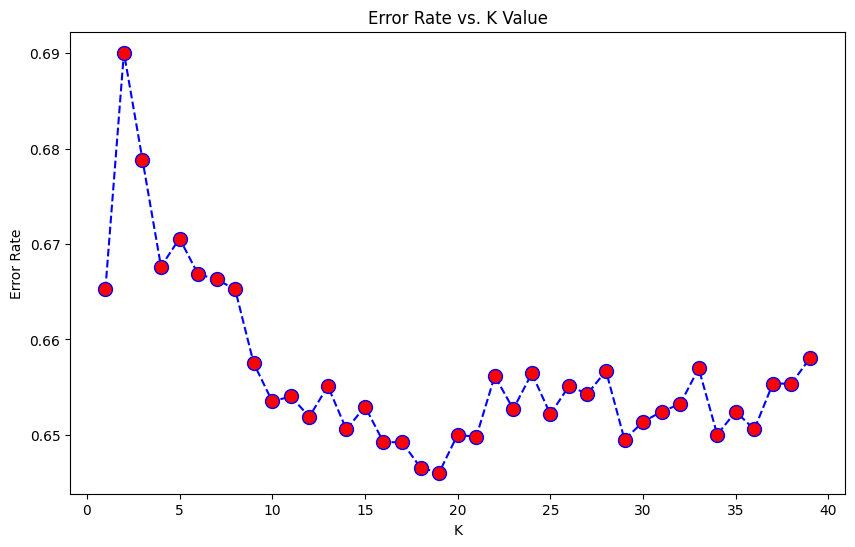

In [7]:
# elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [8]:
#retrain the KNN model with the new K value

# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)


/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.35
_____________________
Weighted Quadratic Kappa: 0.2119


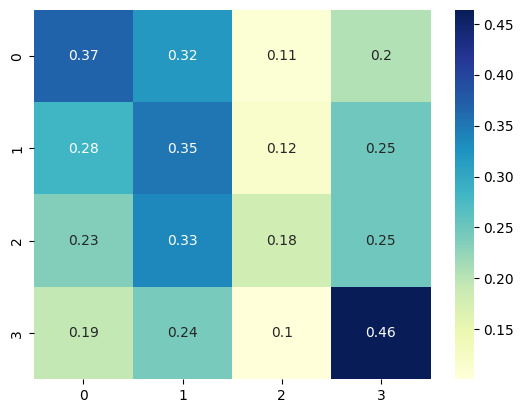

In [9]:
pred = knn.predict(X_test)

# Print accuracy score  and weighted Kappa
our_metrics(y_test, pred, normalize=True)

### Cross validation to find the best value of K

In [15]:
#checking accuracy on train data
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConv

In [16]:
# best parameter from grid search
print(grid_search.best_params_)

{'n_neighbors': 27}


In [17]:
# accuracy
accuracy = grid_search.best_score_ 
print("Accuracy for our training dataset with tuning is : {:f}" .format(accuracy) )

Accuracy for our training dataset with tuning is : 0.352186


In [18]:
#checking accuracy on test data
knn = KNeighborsClassifier(n_neighbors=39)

knn.fit(X_train, np.ravel(y_train))

y_pred_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred_hat)

print("Accuracy for our testing dataset with tuning is : {:2f}".format(test_accuracy) )


Accuracy for our testing dataset with tuning is : 0.341958


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.342
_____________________
Weighted Quadratic Kappa: 0.2346


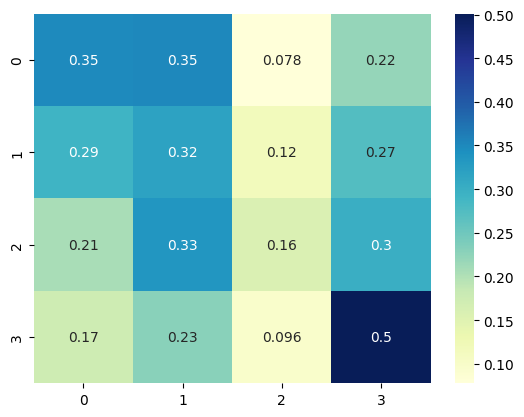

In [19]:
# Print accuracy score  and weighted Kappa
our_metrics(y_test, y_pred_hat, normalize=True)